<a href="https://colab.research.google.com/github/sakshia08/OrbTrack_AI/blob/main/orbtrack_multi-satellite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install skyfield

In [ ]:
from skyfield.api import load
# CelesTrek data
stations_url = 'https://celestrak.com/NORAD/elements/stations.txt'
satellites = load.tle_file(stations_url)


In [ ]:
#ISS location
name_iss = {sat.name: sat for sat in satellites}
iss = name_iss['ISS (ZARYA)']
ts = load.timescale()
t = ts.now()

In [ ]:
#ISS position at current time
geocentric = iss.at(t)
subpoint = geocentric.subpoint()
print(f"Latitude: {subpoint.latitude.degrees:.2f}")
print(f"Longitude: {subpoint.longitude.degrees:.2f}")
print(f"Elevation: {subpoint.elevation.km:.2f} km")

Latitude: 26.97
Longitude: -133.03
Elevation: 417.90 km


In [ ]:
pip install skyfield matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#next 90 minutes all at 1 minute intervals
ts = load.timescale()
times = ts.utc(2025, 6, 16, range(0, 91))

In [ ]:
#pts at each time
latitudes = []
longitudes = []

for t in times:
    subpoint = iss.at(t).subpoint()
    latitudes.append(subpoint.latitude.degrees)
    longitudes.append(subpoint.longitude.degrees)

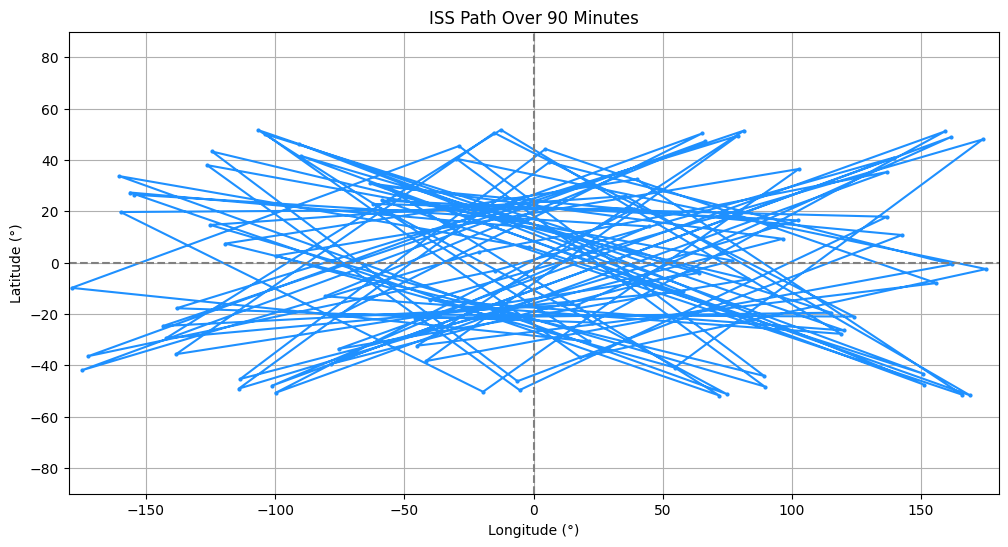

In [ ]:
#path
plt.figure(figsize=(12, 6))
plt.title("ISS Path Over 90 Minutes")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.plot(longitudes, latitudes, marker='o', markersize=2, linestyle='-', color='dodgerblue')
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [ ]:
pip install basemap

In [ ]:
from mpl_toolkits.basemap import Basemap

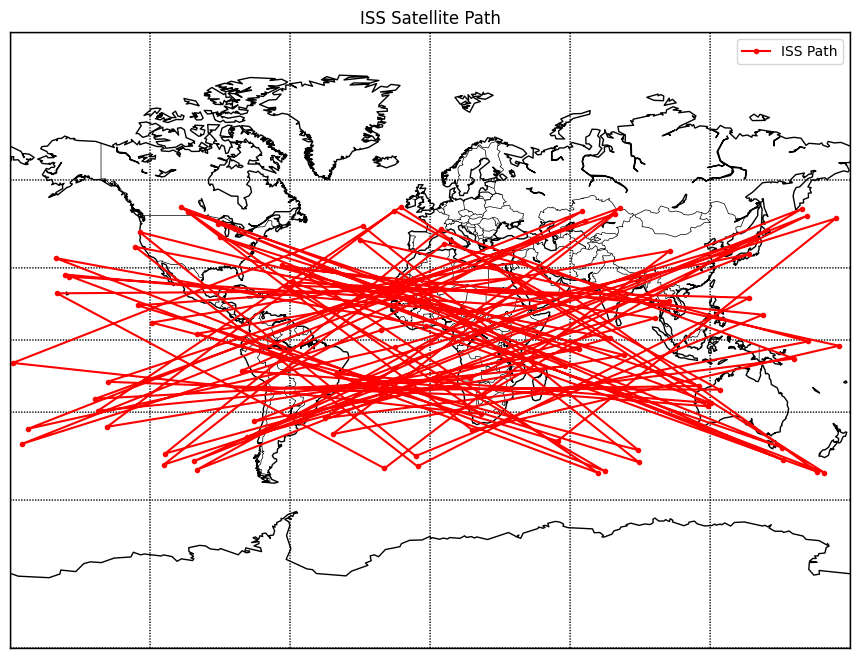

In [ ]:
# Basemap plot
plt.figure(figsize=(14, 8))
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))
m.drawmapboundary()
# Convert tp map coordinates
x, y = m(longitudes, latitudes)
m.plot(x, y, marker='o', markersize=3, color='red', linewidth=1.5, label="ISS Path")
plt.title("ISS Satellite Path")
plt.legend()
plt.show()

In [23]:
tle_urls = [
    'https://celestrak.com/NORAD/elements/stations.txt',  # ISS
    'https://celestrak.com/NORAD/elements/science.txt',   # HST, NOAA
]
satellites = []
for url in tle_urls:
    satellites += load.tle_file(url)

[#################################] 100% science.txt


In [27]:
# multi satellite
names = ["ISS (ZARYA)", "HST", "TERRA"]
colors = ['red', 'blue', 'green']
selected_sats = {sat.name: sat for sat in satellites if sat.name in names}

In [26]:
for sat in satellites:
    print(sat.name)

ISS (ZARYA)
CSS (TIANHE)
ISS (NAUKA)
FREGAT DEB
CSS (WENTIAN)
CSS (MENGTIAN)
TIANZHOU-8
PROGRESS-MS 29
PROGRESS-MS 30
CREW DRAGON 10
SOYUZ-MS 27
SHENZHOU-20 (SZ-20)
HST
POLAR
SWAS
CXO
XMM-NEWTON
TERRA
CLUSTER II-FM7 (SAMBA)
CLUSTER II-FM5 (RUMBA)
CLUSTER II-FM8 (TANGO)
ODIN
TIMED
CORIOLIS
SORCE
MOST
SCISAT 1
SWIFT
HINODE (SOLAR-B)
SHIJIAN-6 02A (SJ-6 02A)
SHIJIAN-6 02B (SJ-6 02B)
FGRST (GLAST)
SDO
CRYOSAT 2
X-SAT
GCOM-W1 (SHIZUKU)
NUSTAR
NEOSSAT
BRITE-AUSTRIA
IRIS
HISAKI (SPRINT-A)
CASSIOPE
STSAT-3
SWARM B
SWARM A
SWARM C
BRITE-CA1 (TORONTO)
OCO 2
BRITE-PL2 (HEWELIUSZ)
MMS 1
MMS 2
MMS 3
MMS 4
ASTROSAT
DAMPE
PISAT
HXMT (HUIYAN)
FLYING LAPTOP
ZHANGHENG 1-01 (CSES)
SALSAT
IXPE


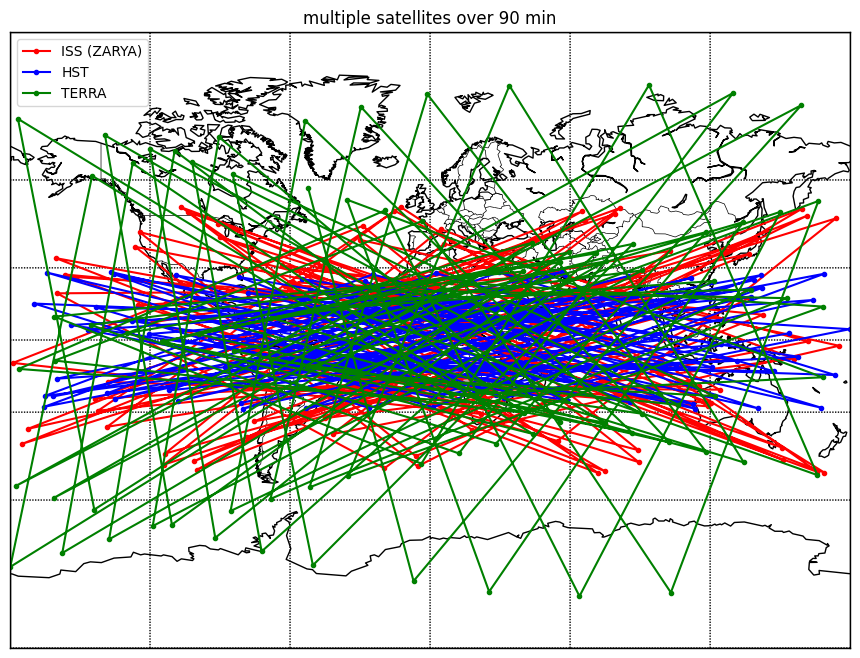

In [33]:
#each on basemap
plt.figure(figsize=(14, 8))
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))
m.drawmapboundary()
for name, color in zip(names, colors):
    latitudes, longitudes = [], []
    for t in times:
        subpoint = selected_sats[name].at(t).subpoint()
        latitudes.append(subpoint.latitude.degrees)
        longitudes.append(subpoint.longitude.degrees)
    x, y = m(longitudes, latitudes)
    m.plot(x, y, marker='o', markersize=3, linewidth=1.5, color=color, label=name)

plt.title("multiple satellites over 90 min")
plt.legend()
plt.show()



In [34]:
ts = load.timescale()
times = ts.utc(2025, 6, 16, range(0, 91, 5)) #every 5 min

In [35]:
#longitude unwrapping
def unwrap_longitudes(lons):
    lons = np.array(lons)
    d = np.diff(lons)
    for i in range(len(d)):
        if d[i] > 180:
            lons[i+1:] -= 360
        elif d[i] < -180:
            lons[i+1:] += 360
    return lons

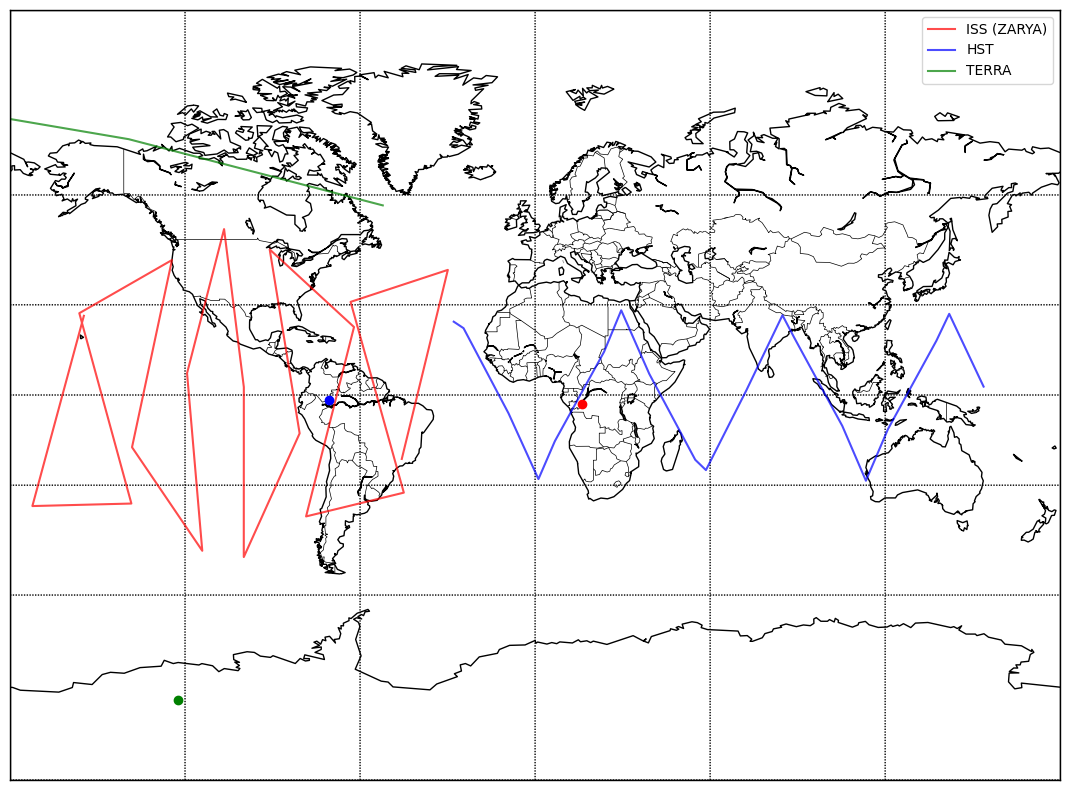

In [38]:
plt.figure(figsize=(14, 8))
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))
m.drawmapboundary()
for name, color in zip(names, colors):
    latitudes, longitudes = [], []
    for t in times:
        subpoint = selected_sats[name].at(t).subpoint()
        latitudes.append(subpoint.latitude.degrees)
        longitudes.append(subpoint.longitude.degrees)

    longitudes = unwrap_longitudes(longitudes)
    x, y = m(longitudes, latitudes)
    m.plot(x, y, linewidth=1.5, alpha=0.7, color=color, label=name)
t_now = ts.now()
for name, color in zip(names, colors):
    subpoint = selected_sats[name].at(t_now).subpoint()
    lon, lat = subpoint.longitude.degrees, subpoint.latitude.degrees
    x, y = m(lon, lat)
    m.plot(x, y, marker='o', color=color, markersize=6)
plt.legend()
plt.tight_layout()
plt.show()
